# Анализ данных интернет-магазина «Стримчик»

## Краткое описание

**Цель исследования** — выявить закономерности, которые определяют успешность компьютерных игр на различных платформах, и на основании этого сделать прогнозы для планирования рекламных кампаний и выпуска потенциально успешных игр в 2017 году. Ключевые задачи включают исследование продаж игр в зависимости от их жанра, платформы, отзывов пользователей и оценок критиков, а также анализ региональных предпочтений.


**Информация о данных:**


Мы работаем с набором данных о продажах компьютерных игр, включающим информацию о названии игр, платформах, годе выпуска, жанрах, оценках критиков и пользователей, региональных продажах и возрастных рейтингах ESRB. Данные охватывают период до 2016 года, но могут содержать пропуски и неполные значения за 2016 год.


**План работы:**


- Открытие и предварительный анализ данных: изучим структуру датасета, проведём преобразование названий столбцов и типов данных. Обработаем пропуски, включая специальные значения, такие как 'tbd'.
- Подготовка данных: проведём расчёт суммарных продаж для каждого региона и сохраним их в новый столбец.
- Исследовательский анализ данных: изучим динамику выпуска игр по годам, продажи по платформам и жанрам, выявим лидеров рынка. Оценим влияние отзывов и оценок критиков на продажи игр.
- Региональный анализ: составим портрет пользователя для разных регионов, исследуем предпочтения по платформам, жанрам и рейтингам ESRB.
- Проверка гипотез: проверим две гипотезы о пользовательских рейтингах для различных платформ и жанров.
- Выводы: подведём итоги анализа и сформулируем рекомендации для будущих маркетинговых кампаний.

## Открытие и изучение данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



По результатам анализа данных методом info() таблицы с информацией о продажах игр можно сделать следующие выводы:


**Количество записей:**


Таблица содержит 16 715 строк (записей), что указывает на общее количество игр, представленных в наборе данных.


**Типы данных:**


- Name — тип данных object, что соответствует названиям игр, представленным в текстовом формате.
- Platform — тип данных object, что корректно для текстовых значений (названия платформ).
- Year_of_Release — тип данных float64, что предполагает числовое значение, но год выпуска целесообразно хранить в формате целых чисел.
- Genre — тип данных object, что корректно для текстовых значений (жанры игр).
- NA_sales, EU_sales, JP_sales, Other_sales — тип данных float64, что подходит для числовых значений (продажи в разных регионах).
- Critic_Score — тип данных float64, что логично для оценок, представленных в виде чисел.
- User_Score — тип данных object, что некорректно для оценок пользователей, так как они должны быть числовыми (возможны значения 'tbd', требующие обработки).
- Rating — тип данных object, что соответствует текстовым обозначениям рейтингов ESRB.


**Пропуски в данных:**


- В столбцах Name и Genre есть по 2 пропущенных значения.
- В Year_of_Release отсутствуют данные для 269 записей.
- Critic_Score содержит значительные пропуски — заполнены только 8137 из 16715 строк.
- В User_Score пропущены данные в 6701 записи, и также встречаются значения 'tbd'.
- Rating имеет 6766 пропущенных значений.


**Необходимость изменения типов данных:**


- Year_of_Release следует преобразовать в целочисленный формат (int), предварительно обработав пропуски.
- User_Score необходимо преобразовать в числовой формат (float64), после обработки значений 'tbd'.


Таким образом, данные требуют обработки пропусков и корректировки типов данных для некоторых столбцов перед дальнейшим анализом.

## Подготовка данных

Для удобной работы с таблицей приведем названия столбцов к нижнему регистру.

In [4]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Проверим датасет на наличие дубликатов.

In [5]:
data.duplicated().sum()

0

В названии игры присутствует 2 пропуска. Проверим их.

In [6]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В данных, где пропущено название игры, отсутвуют так же название жанра (в этом столбце так же присутствует 2 пропуска, значит это они и есть и дополнительно проверять их мы не будем), оценки пользователей и критиков и рейтинг. Удалим эти строки, так как они не несут большой информативности и составляют очень малую долю от общих данных.

Обработанные данные будем сохранять в новую таблицу good_data. Далее работать будем только с ней.

In [7]:
good_data = data.query('name.notna()')
good_data[good_data['name'].isna()].shape[0] #проверим количество пропусков в названии игры

0

В Year_of_Release отсутствуют данные для 269 записей. Эти данные являются очень важными для анализа и предположить их по другим данным достаточно сложно. Так как доля пропусков от общего количества данных не так велика, удалим соответствующие строки.

In [8]:
good_data = good_data.query('year_of_release.notna()')
good_data[good_data['year_of_release'].isna()].shape[0] #проверим количество пропусков в годе выпуска

0

Приведем данные года выпуска игры к целочисленному типу.

In [9]:
good_data['year_of_release'] = good_data['year_of_release'].astype('int')

Заметим, что в данных оценки пользователей присутствует значение 'tbd'. Оно предположительно означает to be determined (подлежит уточнению). Скорее всего значение 'tbd' используется там, где оценка пользователей еще не собрана или слишком мала, а значит является схожим с пропуском данных. Для дальнейшей работы заменим значение 'tbd' на пропуск.

In [10]:
good_data['user_score'].replace('tbd', np.nan, inplace=True)

Приведем данные оценки пользователей к числовому формату.

In [11]:
good_data['user_score'] = good_data['user_score'].astype('float64')

В таблице отсутвует большое количество данных оценки пользователей и критиков. Проверим, есть ли корреляция между ними и другими данными, чтобы мы могли искусственно заменить пропуски на основании других данных.

In [12]:
good_data.query('user_score.notna() and critic_score.notna()').corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,1.000000,-0.020471,0.038022,-0.041715,0.038807,-0.011215,-0.251482
na_sales,-0.020471,1.000000,0.841701,0.468377,0.726931,0.232922,0.085827
eu_sales,0.038022,0.841701,1.000000,0.519490,0.716493,0.212843,0.055798
jp_sales,-0.041715,0.468377,0.519490,1.000000,0.394698,0.147178,0.127920
other_sales,0.038807,0.726931,0.716493,0.394698,1.000000,0.191189,0.057182
critic_score,-0.011215,0.232922,0.212843,0.147178,0.191189,1.000000,0.579671
user_score,-0.251482,0.085827,0.055798,0.127920,0.057182,0.579671,1.000000


Сильной корреляции оценок с другими данными нет. Значит восстановить данные оценок пользователей и критиков по имеющимся данным корректно не получится. Оставим пропуски в данных.

Большое количество пропусков так же наблюдается в рэйтинге игры. Проверим, можно ли определить рейтинг на основании жанра или платформы (например, какие-то жанры могут выпускаться исключительно для определенного возраста)

In [13]:
good_data.pivot_table(index = 'genre', columns = 'rating', values = 'name', aggfunc = 'count')

rating,AO,E,E10+,EC,K-A,M,RP,T
genre,,,,,,,,
Action,1.0,410.0,468.0,1.0,NaN,596.0,NaN,670.0
Adventure,NaN,159.0,67.0,2.0,NaN,98.0,NaN,114.0
Fighting,NaN,8.0,19.0,NaN,NaN,48.0,NaN,357.0
Misc,NaN,449.0,166.0,5.0,1.0,13.0,NaN,228.0
Platform,NaN,354.0,141.0,NaN,NaN,3.0,NaN,63.0
Puzzle,NaN,284.0,42.0,NaN,NaN,NaN,NaN,10.0
Racing,NaN,576.0,95.0,NaN,NaN,18.0,NaN,167.0
Role-Playing,NaN,83.0,111.0,NaN,NaN,161.0,NaN,415.0
Shooter,NaN,47.0,56.0,NaN,NaN,553.0,NaN,340.0


In [14]:
good_data.pivot_table(index = 'platform', columns = 'rating', values = 'name', aggfunc = 'count')

rating,AO,E,E10+,EC,K-A,M,RP,T
platform,,,,,,,,
3DS,NaN,90.0,74.0,NaN,NaN,12.0,NaN,47.0
DC,NaN,3.0,NaN,NaN,NaN,1.0,NaN,10.0
DS,NaN,865.0,254.0,2.0,NaN,10.0,NaN,124.0
GBA,NaN,419.0,24.0,NaN,NaN,7.0,NaN,64.0
GC,NaN,224.0,31.0,1.0,NaN,38.0,NaN,163.0
PC,NaN,136.0,74.0,2.0,2.0,249.0,1.0,293.0
PS,NaN,115.0,NaN,NaN,1.0,19.0,NaN,69.0
PS2,NaN,541.0,125.0,1.0,NaN,222.0,NaN,567.0
PS3,NaN,208.0,138.0,NaN,NaN,260.0,NaN,329.0


Рейтинг имеет достаточно большой разброс по жанрам и платформам, а значит восставить его корректно не получится. Оставим пропуски и в этих данных. Таким образом анализ будет более правдивым.

Добавим к данным столбец с суммарными продажами по всем регионам.

In [15]:
good_data['total_sales'] = good_data['na_sales'] + good_data['eu_sales'] + good_data['jp_sales'] + good_data['other_sales']
good_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Вывод по подготовке данных:**


- Приведение столбцов к нижнему регистру облегчило работу с данными, сделав названия более удобными для анализа.
- Удаление строк с отсутствующими названиями и жанрами было оправдано, так как такие записи не несли значимой информации и составляли малую долю от общего объёма данных.
- Пропуски в столбце year_of_release были удалены, так как они являются критически важными для анализа, и восполнить их корректно невозможно.
- В столбце user_score значение tbd было заменено на пропуск, так как оно обозначает отсутствие данных, а оценка не может быть определена.
- Оценки пользователей и критиков имеют слабую корреляцию с другими показателями, поэтому восполнить пропуски на основе других данных невозможно.
- Пропуски в рейтинге ESRB также не удалось корректно восстановить на основе жанров или платформ, так как распределение рейтингов слишком разнообразно.
- Был добавлен новый столбец total_sales, суммирующий продажи по всем регионам, что позволит проводить дальнейший анализ эффективности игр на мировом уровне.

## Исследовательский анализ данных

### Выпуск игр по годам

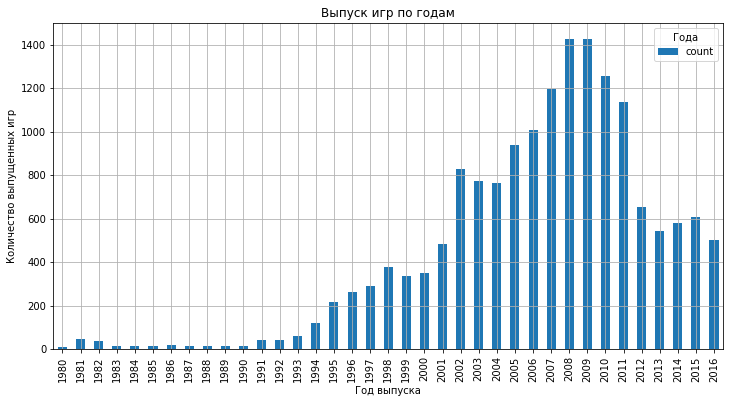

In [16]:
year_release = good_data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').sort_values(by = 'year_of_release')
year_release.columns = ['count']
year_release.plot(kind = 'bar', figsize = (12,6))
plt.title('Выпуск игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.legend(title="Года")
plt.grid(True)
plt.show()

In [17]:
year_release.sort_values(by = 'count', ascending = False).head(10)

,count
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


На основе графика выпуска игр по годам видно, что активное увеличение числа выпускаемых игр началось с конца 90-х годов, достигнув своего пика в период с 2005 по 2011 год. Затем наблюдается снижение количества новых игр, особенно после 2011 года.


Что касается важности данных за все периоды:


- Данные до 2000 года имеют меньшую значимость, так как количество игр в эти годы было значительно ниже. Это связано с тем, что различные платформы только начали появлятся и развиваться и было не много людей, которые могли игры для этих платформ разрабатывать.
- Основной анализ стоит сосредоточить на периоде с 2000 года и позже, так как именно в этот период произошел резкий рост индустрии, и эти данные могут лучше отражать современные тренды. В этот момент рынок компьютерных игр стал более доступным широкому пользователю и, соответственно, более популярным. Больший спрос породил и большее предложение.
- После 2009 года количество выпущенных за год игр начало падать. Это можно объяснить большим количеством причин:
        - многие выпущенные ранее игры стали настоящими хитами и компании сконцентрировались на их поддержании и улучшении
        - рынок стал более требовательным и создавать действительно популярные игры стало сложнее, дольше и дороже
- Период с 2005 по 2016 год можно считать наиболее важным для анализа тенденций выпуска игр, так как в это время наблюдалось максимальное количество релизов.


Таким образом, для прогнозов и анализа современных тенденций предпочтительнее использовать данные за последние 10–15 лет, начиная с 2000 года.

### Продажи по платформам

In [18]:
top_platforms = good_data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False).head(10)
top_platforms

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


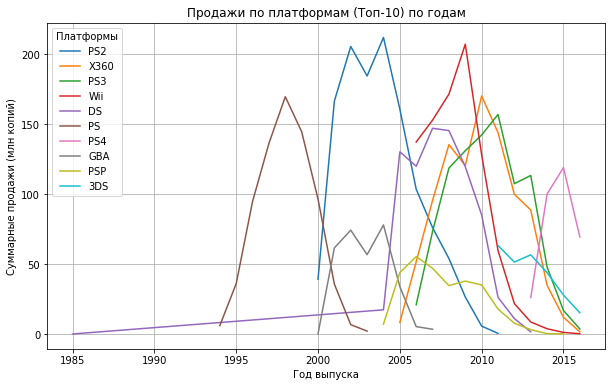

In [19]:
plt.figure(figsize=(10, 6))

for platform in top_platforms.index:
    platform_data = good_data[good_data['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(platform_data.index, platform_data.values, label=platform)

plt.title('Продажи по платформам (Топ-10) по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн копий)')
plt.legend(title="Платформы")
plt.grid(True)
plt.show()

Продажи платформы Nintendo DS в 1985 году выглядят подозрительно, так как Nintendo DS была официально выпущена только в 2004 году. Это означает, что любые данные о продажах этой платформы до 2004 года неверны или являются ошибочными.


Причиной такой ошибки может быть:


- Некорректная дата выпуска: В данных может быть неправильно указан год выпуска игры или платформы, что могло привести к неверному отображению продаж для ранних годов, например, 1985.
- Ошибки в данных: Ошибочные значения могут возникать из-за проблем в процессе сбора данных, ввода информации или интеграции разных наборов данных.

Посмотрим, какие данные содержатся в датасете

In [20]:
good_data.query('platform == "DS" and year_of_release < 2004')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


До 2004 года на DS была по информации из датасета выпущена только одна игра - Strongest Tokyo University Shogi DS. Из открытых интернет-источников мы узнали, что на самом деле она была выпущена в 2007 году. Заменим год выпуска этой игры на корректный.

In [21]:
good_data.loc[good_data['name'] == 'Strongest Tokyo University Shogi DS', 'year_of_release'] = 2007
good_data[good_data['name'] == 'Strongest Tokyo University Shogi DS']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,2007,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


Изменение данных прошло успешно.

Построим график с новыми данными.

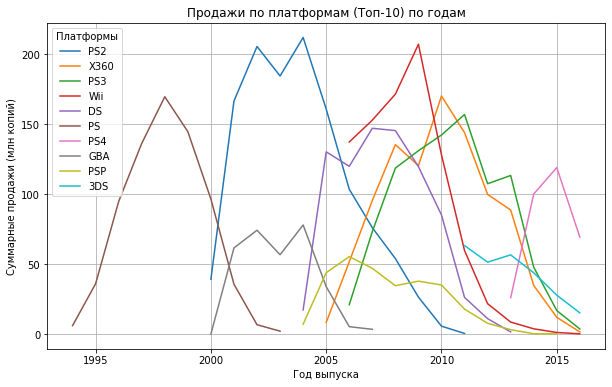

In [22]:
top_platforms = good_data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False).head(10)

plt.figure(figsize=(10, 6))

for platform in top_platforms.index:
    platform_data = good_data[good_data['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(platform_data.index, platform_data.values, label=platform)

plt.title('Продажи по платформам (Топ-10) по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн копий)')
plt.legend(title="Платформы")
plt.grid(True)
plt.show()

In [23]:
platform_long = good_data.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_long['long'] = platform_long['max'] - platform_long['min']
top_platform_long = platform_long.loc[top_platforms.index]
top_platform_long

,min,max,long
platform,,,
PS2,2000,2011,11
X360,2005,2016,11
PS3,2006,2016,10
Wii,2006,2016,10
DS,2004,2013,9
PS,1994,2003,9
PS4,2013,2016,3
GBA,2000,2007,7
PSP,2004,2015,11


На графике отображены изменения суммарных продаж по платформам за годы их существования. Рассмотрим основные моменты:

**Платформы с наибольшими продажами:** 


- PS2 (2000–2011): Долгоживущая платформа с пиком продаж около 2004–2006 годов. Продажи начали снижаться к 2011 году.
- X360 (2005–2016): Пик приходится на 2011–2013 годы, после чего продажи резко снижаются.
- PS3 и Wii (2006–2016): Оба устройства достигли пика в период 2008–2012 годов, после чего их продажи начали падать.
- DS (2004–2013): Платформа с сильным пиком в 2005–2010 годах, продажи начали снижаться после 2010 года.
- PS4 (2013–2016): Недавно появившаяся платформа, пик продаж еще впереди.
- 3DS (2011–2016): Начало продаж совпадает с пиком в 2011 году, хотя по суммарным продажам уступает другим платформам.


**Жизненный цикл платформ:**


- В среднем новые платформы живут около 7–10 лет. 
- Старые платформы исчезают через 7–11 лет активного использования (например, PS2, X360), когда на рынок выходят новые поколения устройств, такие как PS4 и 3DS.
- Платформы, такие как PS, GBA, и PSP, исчезли через 7–9 лет с момента их запуска, уступив место новым устройствам.


**Характерные сроки появления и исчезновения платформ:**


Платформы обычно существуют на рынке от 7 до 11 лет, после чего они теряют актуальность, и на их смену приходят новые модели.

Актуальный период для анализа данных с целью прогноза на 2017 год следует выбирать таким образом, чтобы учесть наиболее свежие и значимые тренды, а также жизненный цикл платформ. Основной упор должен быть на периоды, которые максимально точно отражают текущие тенденции на рынке.


**На основании предыдущего анализа:**


Данные по выпуску игр по годам:


- Начиная с 2002 года наблюдается значительное увеличение количества выпущенных игр, которое достигает максимума в 2008 году (1427 игр) и остаётся на высоком уровне до 2016 года (502 игры).
- Данные с 2008 по 2016 год включают максимальное количество релизов и наиболее актуальны для анализа текущих тенденций.


Жизнь платформ:


- Важно учитывать, что такие платформы, как PS3, X360, Wii, PS4, и 3DS, активно присутствовали на рынке до 2016 года.
- Новые платформы, такие как PS4 (с 2013 года), находятся на подъёме, что важно для прогноза на 2017 год. Также нужно учитывать, что платформы, которые "умирают" к 2016 году (например, PS3, X360), уже не будут актуальны в 2017.


Рекомендованный период для анализа:


- Актуальным периодом для анализа можно считать 2013–2016 годы. Этот период включает в себя данные по новым успешным платформам (таким как PS4 и 3DS), а также демонстрирует последние годы работы старых платформ (PS3, X360), что поможет лучше предсказать продажи на 2017 год.


Обоснование:


- Данные за 2013–2016 годы наиболее актуальны для прогноза, так как они показывают последние тренды на рынке, связаны с текущими успешными платформами и дают представление о перспективах новых платформ в 2017 году.
- Данные до 2013 года включают платформы, которые больше не актуальны, и слишком ранние тренды, которые могут не учитывать современные особенности рынка.


Таким образом, анализ данных за 2013–2016 годы позволит точнее спланировать рекламные кампании и определить наиболее перспективные платформы для 2017 года.

Сделаем срез данных только актуального периода и далее будем работать только с ним. Будем считать актуальным период 2013-2016 гг.

In [24]:
actual_data = good_data.query('year_of_release >= 2013')
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


### Продажи платформ в актуальный период

In [25]:
top_actual_platforms = actual_data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False).head(10)
top_actual_platforms

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


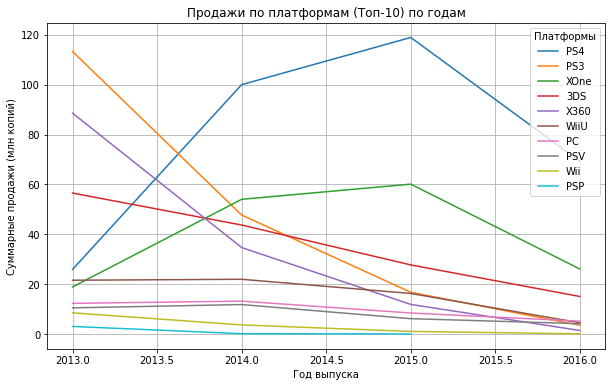

In [26]:
plt.figure(figsize=(10, 6))

for platform in top_actual_platforms.index:
    platform_actual_data = actual_data[actual_data['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(platform_actual_data.index, platform_actual_data.values, label=platform)

plt.title('Продажи по платформам (Топ-10) по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн копий)')
plt.legend(title="Платформы")
plt.grid(True)
plt.show()

На основании графика продаж по платформам (2013–2016):

**Платформы с лидирующими продажами:**


- PS4 (синяя линия) – Продажи PS4 уверенно растут, особенно заметен пик к 2015 году. Это одна из наиболее прибыльных и перспективных платформ.
- XOne (зелёная линия) – Xbox One также демонстрирует устойчивый рост до 2015 года, хотя в 2016 году наблюдается некоторое снижение, но платформа всё ещё является одной из лидирующих.
- 3DS (красная линия) – Продажи постепенно падают, но по-прежнему высоки, особенно в 2013–2014 годах. Несмотря на спад, эта платформа всё ещё имеет значительные объёмы продаж.


**Платформы с падающими продажами:**


- PS3 (оранжевая линия) – Продажи PS3 значительно снизились к 2016 году. Платформа уже не столь прибыльна.
- X360 (фиолетовая линия) – Продажи Xbox 360 также резко упали после 2013 года.
- WiiU и Wii (розовая и жёлтая линии) – Обе платформы показывают тенденцию к снижению, и их актуальность падает.
- PSP (голубая линия) – PSP практически прекратила продаваться после 2013 года.


**Потенциально прибыльные платформы:**


- PS4 – Платформа на пике популярности и показывает уверенный рост, что делает её самой перспективной для будущих инвестиций.
- XOne – Несмотря на небольшое снижение в 2016 году, платформа всё ещё занимает высокие позиции по продажам и имеет потенциал.
- 3DS – Несмотря на замедление, платформа остаётся прибыльной, особенно на краткосрочную перспективу.


**Заключение:**


Для прогнозов на 2017 год наиболее перспективными являются PS4 и XOne, так как они демонстрируют рост или высокие стабильные продажи.

### Разброс продаж по платформам в актуальный период

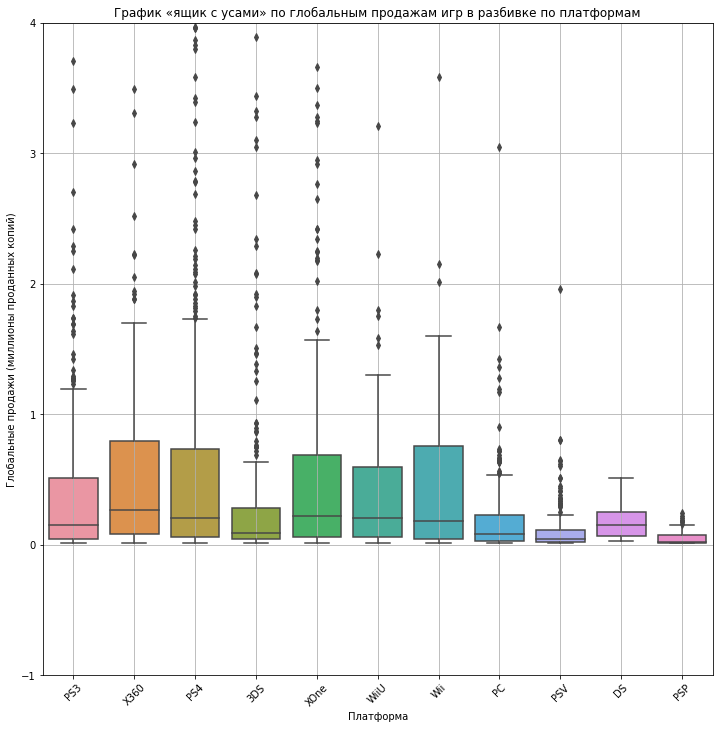

In [27]:
plt.figure(figsize=(12, 12))
sns.boxplot(x='platform', y='total_sales', data=actual_data)

# Настроим график
plt.title('График «ящик с усами» по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (миллионы проданных копий)')
plt.xticks(rotation=45)  # Поворот подписей оси X для удобства чтения
plt.grid(True)
plt.ylim(-1, 4)

# Показать график
plt.show()

На основе графика «ящик с усами» по глобальным продажам игр для разных платформ можно сделать следующие выводы:


**Медианные продажи:**


- У всех платформ медианные продажи относительно низкие, даже 3 квартили находятся ниже отметки в 1 миллион копий.
- Почти доходят до 1 миллиона показатели 3 квартиля только у платформ Wii, X360, PS4, XOne.


**Разброс продаж:**


- Платформы PS3, X360, PS4, 3DS, XOne, WiiU, Wii, PC имеют достаточно широкий разброс значений. Это говорит о том, что на этих платформах есть как игры с очень низкими продажами, так и настоящие хиты, которые продавались в больших количествах.
- В частности, платформы WiU, PS3, X360, PS4, 3DS и XOne имеют большое количество выбросов, что говорит о том, что на этих платформах были игры, которые продавались значительно выше среднего уровня (более 6 миллионов копий).


**Платформы с наибольшими продажами:**


- Самые высокие глобальные продажи наблюдаются у Wii, PS3, X360 и PS4. Эти платформы имеют игры, продажи которых достигают и даже превышают 20 миллионов копий.


**Платформы с низкими продажами:**


- Платформы PSV, DS, PSP имеют заметно меньшие значения как медианы, так и выбросов. Это указывает на то, что на этих платформах средний уровень продаж значительно ниже, и хиты на этих платформах также редки.


**Вывод:**

Платформы PS3, X360, PS4, Wii, WiiU и XOne показали самые высокие продажи игр, что делает их наиболее прибыльными для разработчиков и издателей. 

### Влияние на продажи оценок критиков и пользователей

<Figure size 720x432 with 0 Axes>

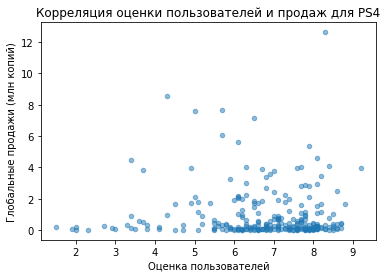

<Figure size 720x432 with 0 Axes>

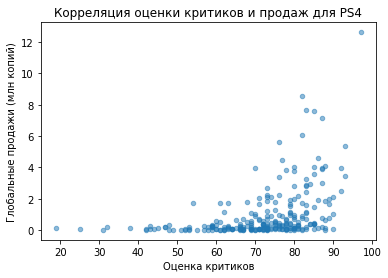

In [28]:
plt.figure(figsize=(10, 6))
actual_data.query('(platform == "PS4") and user_score.notna()').plot(x='user_score', y='total_sales', kind = 'scatter', alpha = 0.5)
plt.title('Корреляция оценки пользователей и продаж для PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн копий)')

plt.figure(figsize=(10, 6))
actual_data.query('(platform == "PS4") and critic_score.notna()').plot(x='critic_score', y='total_sales', kind = 'scatter', alpha = 0.5)
plt.title('Корреляция оценки критиков и продаж для PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи (млн копий)')

plt.show()

In [29]:
corr_user_sales = actual_data.query('(platform == "PS4") and user_score.notna()')['user_score'].corr(actual_data.query('(platform == "PS4") and user_score.notna()')['total_sales'])
corr_critic_sales = actual_data.query('(platform == "PS4") and critic_score.notna()')['critic_score'].corr(actual_data.query('(platform == "PS4") and critic_score.notna()')['total_sales'])

print(f"Корреляция между оценкой пользователей и продажами для PS4: {corr_user_sales:.2f}")
print(f"Корреляция между оценкой критиков и продажами для PS4: {corr_critic_sales:.2f}")

Корреляция между оценкой пользователей и продажами для PS4: -0.03
Корреляция между оценкой критиков и продажами для PS4: 0.41


**Вывод:**

- Оценка пользователей и продажи (Корреляция: -0.03):


Слабая отрицательная корреляция говорит о том, что связь между оценками пользователей и глобальными продажами практически отсутствует. Это значит, что количество продаж не зависит существенно от того, насколько высоко пользователи оценивают игру. Вероятно, на продажи могут влиять другие факторы, такие как маркетинг, известность франшизы и т.д.


- Оценка критиков и продажи (Корреляция: 0.41):


Корреляция 0.41 указывает на умеренную положительную связь между оценками критиков и продажами игр для PS4. Это означает, что игры, получающие более высокие оценки от критиков, имеют тенденцию к более высоким продажам, но данная связь не является очень сильной. Важную роль могут играть и другие факторы, которые нужно учитывать наряду с оценками критиков.


Таким образом, отзывы критиков оказывают более заметное влияние на продажи, чем оценки пользователей. Это может быть связано с тем, что мнения критиков часто рассматриваются как более авторитетные и могут влиять на решения покупателей, особенно для новых игр, тогда как мнения пользователей могут быть более разнообразными и субъективными.

Проверим, схожа ли корреляция будет на других платформах. Выберем несколько различных по объему продаж, чтобы данные не вычислялись только по 1 категории.

In [30]:
for platform in ['XOne', 'WiiU', 'PSV']:
    corr_user_sales = actual_data.query('(platform == @platform) and user_score.notna()')['user_score'].corr(actual_data.query('(platform == @platform) and user_score.notna()')['total_sales'])
    corr_critic_sales = actual_data.query('(platform == @platform) and critic_score.notna()')['critic_score'].corr(actual_data.query('(platform == @platform) and critic_score.notna()')['total_sales'])
    
    print(f"\nКорреляция между оценкой пользователей и продажами для {platform}: {corr_user_sales:.2f}")
    print(f"Корреляция между оценкой критиков и продажами для {platform}: {corr_critic_sales:.2f}")


Корреляция между оценкой пользователей и продажами для XOne: -0.07
Корреляция между оценкой критиков и продажами для XOne: 0.42

Корреляция между оценкой пользователей и продажами для WiiU: 0.42
Корреляция между оценкой критиков и продажами для WiiU: 0.38

Корреляция между оценкой пользователей и продажами для PSV: 0.00
Корреляция между оценкой критиков и продажами для PSV: 0.25


Выводы по корреляциям между оценками и продажами на разных платформах:


- **XOne (XOne):**


- Оценка пользователей и продажи: Корреляция -0.07. Это говорит о слабой отрицательной корреляции, что свидетельствует об отсутствии значимой связи между оценками пользователей и продажами на платформе XOne. Вероятно, продажи игр здесь также зависят от других факторов, таких как популярность бренда или маркетинговые усилия.
- Оценка критиков и продажи: Корреляция 0.42. Умеренная положительная связь указывает на то, что высокие оценки критиков могут оказывать большее влияние на продажи игр на платформе XOne, но также не являются решающим фактором.


- **Wii U:**


- Оценка пользователей и продажи: Корреляция 0.42. Умеренная положительная корреляция для Wii U показывает, что мнения пользователей на этой платформе оказывают большее влияние на продажи по сравнению с другими платформами. Это может свидетельствовать о том, что пользователи Wii U склонны доверять отзывам других игроков.
- Оценка критиков и продажи: Корреляция 0.38. Хотя корреляция немного ниже, чем у пользовательских оценок, тем не менее, отзывы критиков также оказывают заметное влияние на продажи игр на Wii U.


- **PSV:**


- Оценка пользователей и продажи: Корреляция 0.00. Отсутствие корреляции указывает на то, что на платформе PSV отзывы пользователей никак не влияют на продажи игр. Вероятно, решения покупателей на этой платформе основываются на других факторах.
- Оценка критиков и продажи: Корреляция 0.25. Хотя влияние оценок критиков присутствует, оно сравнительно слабое по сравнению с другими платформами.


**Общий вывод:**


На большинстве платформ (XOne и Wii U) оценки критиков оказывают более сильное влияние на продажи, чем отзывы пользователей. Однако на Wii U мнения пользователей также играют важную роль, в отличие от других платформ, где эта связь значительно слабее (XOne) или отсутствует (PSV). Это может говорить о том, что покупатели на каждой платформе ориентируются на разные факторы при принятии решения о покупке игр.

### Общее распределение игр по жанрам

In [31]:
genre_sales = actual_data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = ['count', 'sum', 'median'])
genre_sales.columns = ['count_sales', 'sum_sales', 'median_sales']
genre_sales.sort_values(by = 'sum_sales')

,count_sales,sum_sales,median_sales
genre,,,
Puzzle,17,3.17,0.060
Strategy,56,10.08,0.080
Simulation,62,21.76,0.100
Adventure,245,23.64,0.030
Fighting,80,35.31,0.125
Racing,85,39.89,0.120
Platform,74,42.63,0.225
Misc,155,62.82,0.100
Role-Playing,292,145.89,0.125


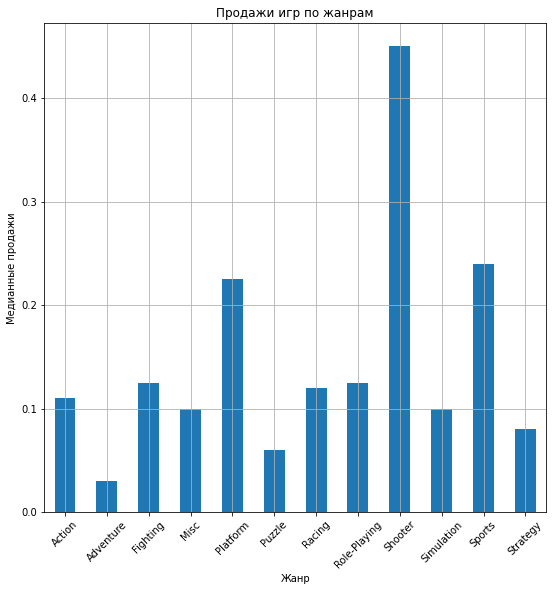

In [32]:
genre_sales['median_sales'].plot(kind = 'bar', title = 'Продажи игр по жанрам', figsize = (9,9));
plt.xlabel('Жанр')
plt.ylabel('Медианные продажи')
plt.xticks(rotation=45)  # Поворот подписей оси X для удобства чтения
plt.grid(True)
plt.show()

1. **Самые прибыльные жанры:**


- Action: Жанр Action имеет наибольшие суммарные продажи — 321,87 миллионов копий. Это неудивительно, так как такие игры зачастую пользуются широкой популярностью среди игроков благодаря динамичному игровому процессу.
- Shooter: Жанр Shooter занимает второе место по суммарным продажам с 232,98 миллионами копий. Шутеры остаются одними из самых популярных жанров, часто привлекают аудиторию за счёт мультиплеера и высокой интерактивности.
- Sports: Жанр спортивных игр тоже является прибыльным, с 150,65 миллионами проданных копий, что показывает интерес к спортивным симуляторам и ежегодным играм.


2. **Менее прибыльные жанры:**


- Puzzle и Adventure: Эти жанры имеют самые низкие продажи — Puzzle (3,17 миллионов копий) и Adventure (23,64 миллиона копий). Эти жанры, как правило, рассчитаны на более узкую аудиторию, и их сложность или специфический игровой процесс могут ограничивать их популярность.
- Strategy и Simulation: Жанры Strategy (10,08 млн копий) и Simulation (21,76 млн копий) тоже относятся к менее прибыльным категориям, несмотря на стабильную нишевую аудиторию.


3. **Срединные жанры:**


- Fighting, Racing, и Platform: Эти жанры имеют средние показатели по продажам — от 35 до 42 миллионов копий, что показывает их умеренную популярность среди игроков.
- Misc и Role-Playing: Эти жанры имеют довольно высокий уровень продаж (62,82 и 145,89 млн копий соответственно), причём ролевые игры (Role-Playing) выделяются как один из более успешных жанров, с медианной продажей в 0,125 миллионов копий на игру.


4. **Медианные продажи** (будут наиболее показательны для анализа рынка игр):


- **Жанры с наибольшими медианными продажами:**
- Shooter (0.450 млн копий): Этот жанр лидирует по медианным продажам, что говорит о том, что даже игры средней популярности в этом жанре продаются значительно лучше по сравнению с играми в других жанрах. Высокая медиана указывает на стабильный интерес к шутерам среди игроков.
- Sports (0.240 млн копий): Спортивные игры занимают второе место по медианным продажам, что свидетельствует о высокой популярности спортивных игр. Медиана достаточно высокая, что говорит о стабильных продажах как популярных, так и менее известных проектов.
- Platform (0.225 млн копий): Платформеры также имеют высокие медианные продажи, что говорит о том, что даже менее известные игры в этом жанре могут демонстрировать хорошие результаты.
- **Жанры с умеренными медианными продажами:**
- Fighting и Role-Playing (по 0.125 млн копий): Игры в жанре "Файтинги" и "Ролевые игры" имеют достаточно стабильные медианные продажи. Это свидетельствует о том, что эти жанры удерживают свою нишу, где большинство игр могут рассчитывать на относительно хорошие продажи.
- Racing (0.120 млн копий) и Action (0.110 млн копий): Жанры гонок и экшенов также демонстрируют уверенные медианные продажи, что говорит о достаточно стабильной аудитории, несмотря на большое количество выпущенных игр.
- **Жанры с низкими медианными продажами:**
- Simulation, Misc, и Strategy (по 0.100 млн копий): Эти жанры демонстрируют более низкие медианные продажи, что может свидетельствовать о том, что хотя в них выходят успешные игры, большинство проектов продаются на среднем или низком уровне.
- Puzzle (0.060 млн копий): Жанр головоломок имеет наименьшие медианные продажи. Это может свидетельствовать о том, что такие игры, несмотря на свою нишевость, не имеют значительного коммерческого успеха.
- Adventure (0.030 млн копий): Самый низкий показатель медианных продаж среди всех жанров указывает на то, что большинство игр в жанре приключений продаются плохо, несмотря на возможные редкие успешные проекты.


**Основные выводы:**


- Жанры Shooter и Sports выделяются как наиболее прибыльные с точки зрения медианных продаж, что свидетельствует о стабильности и популярности данных жанров.
- Жанры с низкими медианными продажами, такие как Puzzle и Adventure, имеют узкую аудиторию, что делает их менее успешными с коммерческой точки зрения.







## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5) по регионам

In [33]:
na_platform = actual_data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).head(5)
jp_platform = actual_data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).head(5)
eu_platform = actual_data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).head(5)

print("Топ 5 платформ в Северной Америке:")
print(na_platform)
print("\nТоп 5 платформ в Европе:")
print(eu_platform)
print("\nТоп 5 платформ в Японии:")
print(jp_platform)

Топ 5 платформ в Северной Америке:
          na_sales
platform          
PS4         108.74
XOne         93.12
X360         81.66
PS3          63.50
3DS          38.20

Топ 5 платформ в Европе:
          eu_sales
platform          
PS4         141.09
PS3          67.81
XOne         51.59
X360         42.52
3DS          30.96

Топ 5 платформ в Японии:
          jp_sales
platform          
3DS          67.81
PS3          23.35
PSV          18.59
PS4          15.96
WiiU         10.88


Создадим графики долей продаж для каждого региона

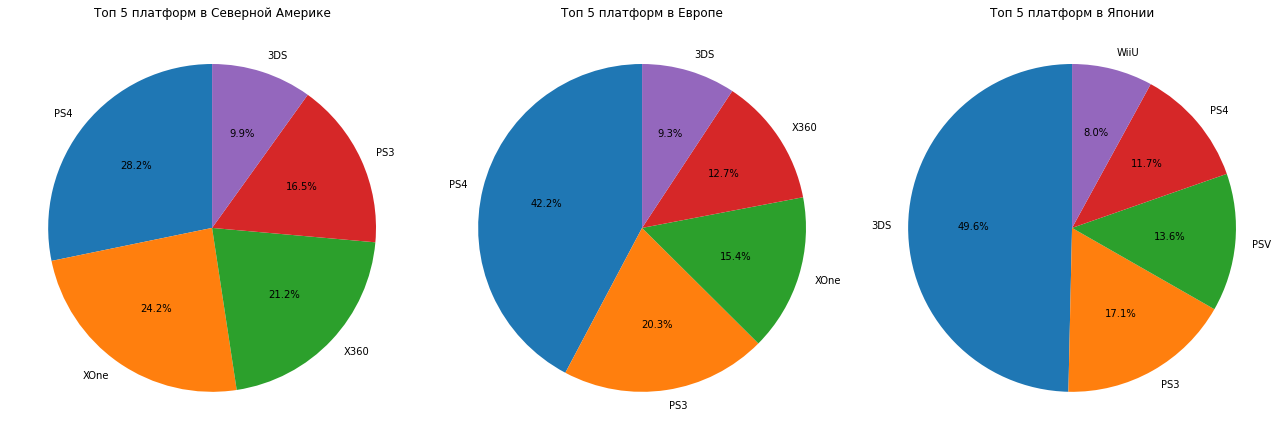

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# График для NA
axs[0].pie(na_platform['na_sales'], labels=na_platform.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Топ 5 платформ в Северной Америке')

# График для EU
axs[1].pie(eu_platform['eu_sales'], labels=eu_platform.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Топ 5 платформ в Европе')

# График для JP
axs[2].pie(jp_platform['jp_sales'], labels=jp_platform.index, autopct='%1.1f%%', startangle=90)
axs[2].set_title('Топ 5 платформ в Японии')

plt.tight_layout()
plt.show()

**Различия в долях продаж платформ по регионам:**


1. **Северная Америка (NA):**


Лидеры по продажам:


- PS4 — 108.74 млн
- XOne — 93.12 млн
- X360 — 81.66 млн
- PS3 — 63.50 млн
- 3DS — 38.20 млн


Особенности: 

В Северной Америке доминируют консоли PS и Xbox. PS4 лидирует с большим отрывом, но XOne и X360 также пользуются значительной популярностью. В то же время, 3DS показывает хорошие результаты, но её продажи ниже по сравнению с другими.


2. **Европа (EU):**


Лидеры по продажам:


- PS4 — 141.09 млн
- PS3 — 67.81 млн
- XOne — 51.59 млн
- X360 — 42.52 млн
- 3DS — 30.96 млн


Особенности: 

В Европе PS также является лидером, причем PS4 значительно опережает другие платформы. Продажи PS3 почти в два раза выше, чем у XOne и X360, что говорит о популярности платформ PS. Xbox занимает более слабые позиции по сравнению с Северной Америкой, а 3DS немного менее популярна.


3. **Япония (JP):**


Лидеры по продажам:


- 3DS — 67.81 млн
- PS3 — 23.35 млн
- PSV — 18.59 млн
- PS4 — 15.96 млн
- WiiU — 10.88 млн


Особенности: 


Япония сильно отличается от западных рынков. Здесь лидирует 3DS, которая значительно опережает другие платформы. Также популярны PS3 и PSV. PS4, хотя и занимает 4-е место, значительно уступает своим результатам в Северной Америке и Европе. Консоли 3DS и Wii U, имеют более высокие продажи в Японии.


**Выводы:**


- Северная Америка и Европа демонстрируют схожие предпочтения, с сильным доминированием PlayStation 4. Однако в Северной Америке консоли Xbox гораздо популярнее, чем в Европе.
- Японский рынок существенно отличается, с явным акцентом на портативные консоли, особенно Nintendo 3DS и PS Vita, что связано с культурными предпочтениями и образом жизни в регионе.

### Самые популярные жанры (топ-5) по регионам

In [35]:
na_genre = actual_data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).head(5)
jp_genre = actual_data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).head(5)
eu_genre = actual_data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).head(5)

print("Топ 5 жанров в Северной Америке:")
print(na_genre)
print("\nТоп 5 жанров в Европе:")
print(eu_genre)
print("\nТоп 5 жанров в Японии:")
print(jp_genre)

Топ 5 жанров в Северной Америке:
              na_sales
genre                 
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49

Топ 5 жанров в Европе:
              eu_sales
genre                 
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19

Топ 5 жанров в Японии:
              jp_sales
genre                 
Role-Playing     51.04
Action           40.49
Misc              9.20
Fighting          7.65
Shooter           6.61


Создадим графики долей продаж для каждого региона

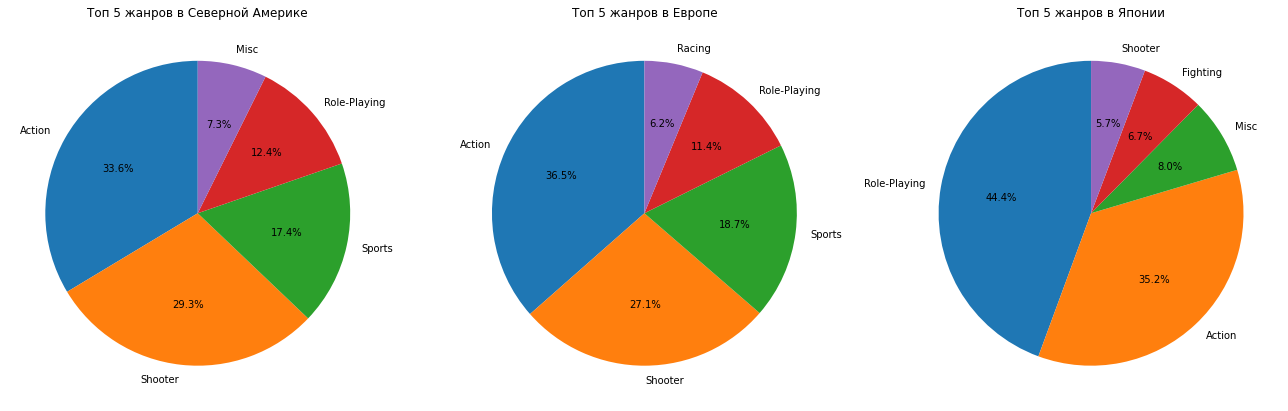

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# График для NA
axs[0].pie(na_genre['na_sales'], labels=na_genre.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Топ 5 жанров в Северной Америке')

# График для EU
axs[1].pie(eu_genre['eu_sales'], labels=eu_genre.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Топ 5 жанров в Европе')

# График для JP
axs[2].pie(jp_genre['jp_sales'], labels=jp_genre.index, autopct='%1.1f%%', startangle=90)
axs[2].set_title('Топ 5 жанров в Японии')

plt.tight_layout()
plt.show()

**Различия в популярности жанров по регионам:**


1. **Северная Америка (NA):**


Топ-5 жанров:


- Action — 126.05 млн
- Shooter — 109.74 млн
- Sports — 65.27 млн
- Role-Playing — 46.40 млн
- Misc — 27.49 млн


Особенности: 


В Северной Америке лидируют экшн-игры и шутеры, что свидетельствует о высокой популярности динамичных и соревновательных жанров. Жанр «Sports» занимает третье место, указывая на значительный интерес к спортивным симуляторам. Ролевые игры (Role-Playing) также популярны, хотя их продажи значительно уступают лидерам.


2. **Европа (EU):**


Топ-5 жанров:


- Action — 118.13 млн
- Shooter — 87.86 млн
- Sports — 60.52 млн
- Role-Playing — 36.97 млн
- Racing — 20.19 млн


Особенности: 


В Европе картина схожа с Северной Америкой — жанры Action и Shooter занимают лидирующие позиции. Однако интерес к гоночным играм (Racing) выражен сильнее, чем в других регионах, что делает этот жанр пятым по популярности. Sports и Role-Playing также демонстрируют хорошие результаты, но они менее популярны, чем в Северной Америке.


3. **Япония (JP):**


Топ-5 жанров:


- Role-Playing — 51.04 млн
- Action — 40.49 млн
- Misc — 9.20 млн
- Fighting — 7.65 млн
- Shooter — 6.61 млн


Особенности: 

В Японии кардинально отличается предпочтение жанров — на первом месте находятся ролевые игры (Role-Playing), что объясняется большой популярностью JRPG (японских ролевых игр) среди местных игроков. Action-игры занимают второе место, а шутеры, которые лидируют в других регионах, находятся лишь на пятом месте. Здесь также популярны жанры Misc и Fighting, что говорит о разнообразии вкусов японских игроков.


**Выводы:**


- Северная Америка и Европа имеют схожие предпочтения: доминируют жанры Action и Shooter, с большой популярностью спортивных игр.
- Япония существенно отличается: здесь наибольшей популярностью пользуются ролевые игры, и жанры, такие как Fighting, Misc, имеют большее значение, тогда как шутеры занимают лишь пятое место.

### Влияния рейтинга ESRB на продажи в регионах

In [37]:
esrb_region = actual_data.query('rating.notna()').pivot_table(index = 'rating', values = ['eu_sales', 'jp_sales', 'na_sales'], aggfunc = 'mean')
esrb_region

,eu_sales,jp_sales,na_sales
rating,,,
E,0.276026,0.050132,0.261755
E10+,0.169405,0.023373,0.215238
M,0.393821,0.038238,0.447724
T,0.125976,0.061832,0.149520


Визуализируем данные с использованием столбчатой диаграммы

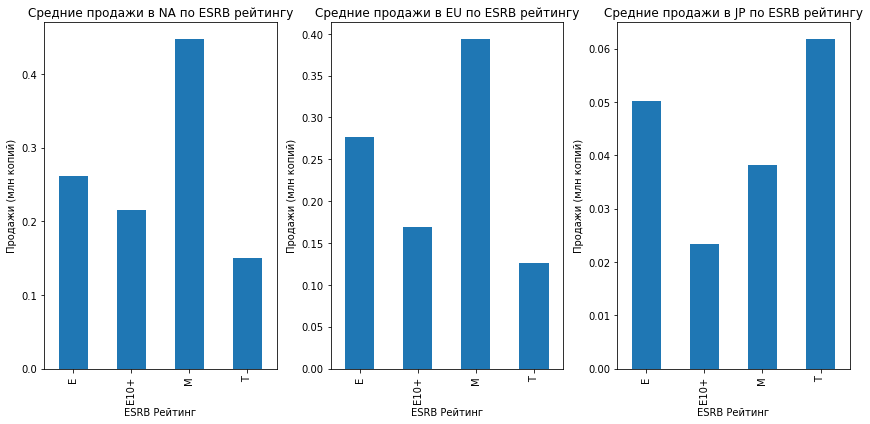

In [38]:
plt.figure(figsize=(12, 6))

# Построим диаграмму для NA
plt.subplot(1, 3, 1)
esrb_region['na_sales'].plot(kind='bar')
plt.title('Средние продажи в NA по ESRB рейтингу')
plt.ylabel('Продажи (млн копий)')
plt.xlabel('ESRB Рейтинг')

# Построим диаграмму для EU
plt.subplot(1, 3, 2)
esrb_region['eu_sales'].plot(kind='bar')
plt.title('Средние продажи в EU по ESRB рейтингу')
plt.ylabel('Продажи (млн копий)')
plt.xlabel('ESRB Рейтинг')

# Построим диаграмму для JP
plt.subplot(1, 3, 3)
esrb_region['jp_sales'].plot(kind='bar')
plt.title('Средние продажи в JP по ESRB рейтингу')
plt.ylabel('Продажи (млн копий)')
plt.xlabel('ESRB Рейтинг')

plt.tight_layout()
plt.show()

Проверим корреляцию между рейтингом и продажами в разных регионах

In [39]:
# Поскольку ESRB_Rating не числовое, его нужно закодировать для корреляции
actual_data['rating_code'] = actual_data['rating'].astype('category').cat.codes

# Корреляция между рейтингом ESRB и продажами
corr_na = actual_data[['rating_code', 'na_sales']].corr().iloc[0, 1]
corr_eu = actual_data[['rating_code', 'eu_sales']].corr().iloc[0, 1]
corr_jp = actual_data[['rating_code', 'jp_sales']].corr().iloc[0, 1]

print(f"Корреляция между ESRB рейтингом и продажами в NA: {corr_na}")
print(f"Корреляция между ESRB рейтингом и продажами в EU: {corr_eu}")
print(f"Корреляция между ESRB рейтингом и продажами в JP: {corr_jp}")

Корреляция между ESRB рейтингом и продажами в NA: 0.1314129899552676
Корреляция между ESRB рейтингом и продажами в EU: 0.11551645188044288
Корреляция между ESRB рейтингом и продажами в JP: -0.06617316239239068


/tmp/ipykernel_138/2667543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_data['rating_code'] = actual_data['rating'].astype('category').cat.codes


1. **Северная Америка (NA):**


- Корреляция: 0.13 (умеренная положительная корреляция)
- Рейтинг M («Для взрослых») занимает лидирующую позицию по продажам (44.8%), за ним следуют игры с рейтингами E («Для всех») и E10+ («Для детей от 10 лет»). Это свидетельствует о том, что взрослые игры имеют значительное влияние на рынок Северной Америки, хотя корреляция невысока, что может означать, что другие факторы также сильно влияют на продажи.


2. **Европа (EU):**


- Корреляция: 0.12 (слабая положительная корреляция)
- В Европе также лидируют игры с рейтингом M (39.4%), что подтверждает схожесть с Северной Америкой в предпочтениях более взрослой аудитории. Однако рейтинг E также демонстрирует хорошие результаты, занимая второе место. Корреляция остается слабой, указывая на слабую зависимость между рейтингом и продажами.


3. **Япония (JP):**


- Корреляция: -0.07 (слабая отрицательная корреляция)
- В Японии наблюдается другая картина: рейтинг ESRB не оказывает столь значительного влияния на продажи. Ведущие позиции занимают игры с рейтингом Role-Playing, и, несмотря на низкие продажи игр с рейтингом M, корреляция отрицательная, что говорит о слабом или даже обратном влиянии рейтинга на предпочтения местных игроков.


**Выводы:**
- В Северной Америке и Европе рейтинг ESRB оказывает умеренное влияние на продажи игр, особенно с рейтингом M. Эти регионы ориентированы на взрослую аудиторию.
- В Японии рейтинг ESRB не играет существенной роли в продажах, и влияние рейтингов M и T меньше, чем в западных регионах.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC

**Формулировка гипотез:**


- Нулевая гипотеза (H0): Средние пользовательские рейтинги для платформ Xbox One и PC одинаковые


Это означает, что между средними значениями рейтингов на двух платформах нет статистически значимых различий.

 
- Альтернативная гипотеза (H1): Средние пользовательские рейтинги для платформ Xbox One и PC различаются


Это утверждает, что средние пользовательские рейтинги на этих платформах отличаются.


**Обоснование гипотез:**


- Нулевая гипотеза предполагает, что наблюдаемые различия в рейтингах могут быть вызваны случайностью, и средние значения рейтингов на этих двух платформах в действительности равны.
- Альтернативная гипотеза утверждает, что существуют значимые различия в средних пользовательских рейтингах для платформ Xbox One и PC, и они не могут быть объяснены случайными вариациями.


**Критерий для проверки гипотезы:**


Мы применим двусторонний t-тест для независимых выборок. Этот тест сравнивает средние значения двух групп, предполагая, что данные распределены нормально и дисперсии примерно равны.В данном случае, пользовательские рейтинги можно рассматривать как такие данные.



In [40]:
xbox_one_score = actual_data.query('(platform == "XOne") and user_score.notna()')['user_score']
pc_score = actual_data.query('(platform == "PC") and user_score.notna()')['user_score']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(xbox_one_score, pc_score, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < 0.05:
    print("Отвергаем нулевую гипотезу: средние рейтинги Xbox One и PC различаются.")
else:
    print("Не отвергаем нулевую гипотезу: средние рейтинги Xbox One и PC одинаковы.")


p-значение: 0.14759594013430463
Не отвергаем нулевую гипотезу: средние рейтинги Xbox One и PC одинаковы.


**Вывод:**


- Не отвергаем нулевую гипотезу: это значит, что у нас недостаточно доказательств для того, чтобы утверждать, что средние пользовательские рейтинги для платформ Xbox One и PC различаются.
- Средние рейтинги на этих платформах можно считать одинаковыми, и любые наблюдаемые различия в выборках скорее всего случайны и не статистически значимы.

Для прогноза на 2017 год тот факт, что средние пользовательские рейтинги для платформ Xbox One и PC статистически одинаковы, означает следующее:


- Похожее восприятие игр на обеих платформах: Игры на Xbox One и PC воспринимаются пользователями схожим образом, что позволяет продвигать одни и те же игры для обеих платформ без значительных адаптаций.
- Единая рекламная стратегия: Поскольку различия в оценках незначительны, можно разрабатывать единую рекламную стратегию для игр на Xbox One и PC, что снизит затраты и повысит эффективность кампаний.
- Фокус на другие факторы: Поскольку рейтинги схожи, при прогнозе продаж важно учитывать другие факторы, такие как популярность платформы в конкретных регионах, жанры игр и другие характеристики, которые могут больше влиять на выбор аудитории.

### Средние пользовательские рейтинги жанров Action и Sports 

**Формулировка гипотез:**


- Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковы.


Это означает, что любые различия в средних рейтингах, которые могут быть обнаружены в данных, являются случайными и несущественными.


- Альтернативная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports различаются.


Это означает, что есть статистически значимое различие в оценках пользователей между этими двумя жанрами.


**Обоснование гипотез:**


- Нулевая гипотеза всегда предполагает отсутствие эффекта или различий — в данном случае, это гипотеза о том, что разницы в средних рейтингах между жанрами нет.


- Альтернативная гипотеза проверяет наличие эффекта или различий — в данном случае, это гипотеза о том, что разница между жанрами в пользовательских оценках существует.


**Критерий для проверки гипотезы:**


Для проверки гипотезы о равенстве средних двух выборок используется t-тест для независимых выборок. Этот тест применяют, когда данные в двух группах независимы и распределены нормально, а также если дисперсии в выборках могут считаться одинаковыми

In [41]:
action_score = actual_data.query('(genre == "Action") and user_score.notna()')['user_score']
sports_score = actual_data.query('(genre == "Sports") and user_score.notna()')['user_score']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(action_score, sports_score, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < 0.05:
    print("Отвергаем нулевую гипотезу: средние рейтинги жанров Action и Sports различаются.")
else:
    print("Не отвергаем нулевую гипотезу: средние рейтинги жанров Action и Sports одинаковы.")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу: средние рейтинги жанров Action и Sports различаются.


**Вывод:**


На основании проведённого теста нулевая гипотеза, предполагающая, что средние пользовательские рейтинги жанров Action и Sports одинаковы, была отвергнута. p-значение составило 1.45e-20, что значительно меньше общепринятого уровня значимости (например, α = 0.05). Это свидетельствует о том, что существует статистически значимое различие между средними пользовательскими рейтингами этих жанров. Следовательно, можно утверждать, что пользователи оценивают жанры Action и Sports по-разному.

Для прогноза на 2017 год различие в оценках жанров Action и Sports указывает на разные предпочтения пользователей. Рекламные кампании также можно адаптировать, учитывая эти различия, чтобы эффективно привлекать аудитории каждого жанра.

## Общий вывод

Проект по анализу данных о продажах видеоигр продемонстрировал ряд важных тенденций, которые могут быть полезны для будущих прогнозов и стратегий в игровой индустрии. Ниже приведены ключевые выводы:


**Открытие и изучение данных:**


- Данные содержат 16 715 записей с информацией по продажам игр, платформам, оценкам пользователей и критиков, а также жанрам и рейтингам.
- Присутствуют значительные пропуски в данных по оценкам пользователей, критиков и ESRB-рейтингам. 
- Типы данных были частично некорректными, что потребовало приведения их к нужному формату (например, преобразование года выпуска в целочисленный формат, а оценок пользователей в числовой формат).


**Подготовка данных:**


- Были удалены строки с отсутствующими названиями игр и жанрами, так как такие данные не несут значимой информации.
- Пропуски в столбце "Year_of_Release" также были удалены из-за их критической важности.
- В столбце с оценками пользователей ("User_Score") значения 'tbd' заменены на пропуски.
- Для анализа добавлен новый столбец "Total_Sales", суммирующий продажи во всех регионах.


**Анализ трендов по платформам и годам:**


- Выпуск игр активно увеличивался с конца 90-х и достиг пика в 2005–2011 годах, после чего начал снижаться.
- Жизненный цикл игровых платформ составляет в среднем 7–10 лет, после чего они уступают место новым поколениям.
- Для прогноза на 2017 год наиболее актуален период 2013–2016 годов, когда на рынок вышли новые успешные платформы, такие как PS4 и XOne.


**Продажи по платформам в актуальный период (2013–2016):**


- Лидерами продаж стали платформы PS4 и XOne, показывающие уверенный рост.
- Платформы PS3, X360 и Wii демонстрируют значительное снижение продаж, что свидетельствует о завершении их жизненного цикла.
- PS4 является самой перспективной платформой для прогнозов на 2017 год, поскольку её продажи продолжают расти.


**Анализ жанров:**


- Жанры Action, Shooter и Sports оказались самыми прибыльными, принося самую большую долю продаж.
- Жанры Puzzle и Adventure имеют самые низкие продажи, что указывает на их нишевую популярность.
- Средние продажи игр в жанре Shooter самые высокие, что подтверждает его стабильную популярность среди игроков.


**Региональные особенности:***


- В Северной Америке и Европе платформы PS и Xbox доминируют, с PS4 на первом месте. В то же время в Японии более популярны портативные консоли, такие как 3DS и PSV.
- В Северной Америке и Европе самые популярные жанры — это Action и Shooter, в то время как в Японии лидируют Role-Playing игры.
- Японский рынок сильно отличается от западных регионов: здесь больше внимания уделяется портативным платформам и ролевым играм.


**Корреляция между оценками и продажами:**


- Связь между оценками пользователей и продажами оказалась незначительной. Это указывает на то, что продажи не зависят напрямую от пользовательских оценок.
- Оценки критиков имеют умеренную положительную корреляцию с продажами, особенно на таких платформах, как PS4 и XOne. Игры, получившие высокие оценки критиков, имеют больше шансов на успешные продажи.


**Рекомендации по сбору данных:**


- Отбор признаков для прогнозирования: Для прогнозирования продаж рекомендуется использовать такие признаки, как платформа, жанр игры, оценки критиков, регион продаж и год выпуска. Это поможет точнее предсказывать успех игр на разных рынках.
- Избежание дубликатов и пропущенных значений: Чтобы минимизировать влияние отсутствующих данных, рекомендуется регулярно обновлять данные и следить за их полнотой. Для платформ и жанров, для которых отсутствует информация, можно использовать методы прогнозирования на основе схожих игр или тенденций.
- Актуализация данных: Постоянное обновление данных и мониторинг новых платформ и игр помогут поддерживать актуальность моделей прогнозирования.


**Заключение:**

Как спрогнозировать рынок игр в 2017 году: Для прогноза на 2017 год важно учитывать данные за последние несколько лет (2013-2016), фокусируясь на платформах с ростом продаж (PS4 и XOne) и жанрах, показывающих наибольшую прибыльность (Action, Shooter). Следует обратить внимание на жизненные циклы платформ и смену поколений консолей. Успех игр на новых платформах (PS4 и XOne) будет важным фактором в 2017 году.


Анализ данных по продажам игр позволяет сделать вывод, что успешные стратегии маркетинга и прогнозы должны основываться на современных трендах, таких как рост продаж на платформах PS4 и XOne и высокая популярность жанров Action и Shooter. Региональные особенности также играют важную роль, что требует учёта культурных предпочтений в разных регионах при разработке игр.